In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Data = pd.read_csv("/content/drive/MyDrive/expected_ctc.csv")

In [6]:
Data.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [7]:
Data.describe()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12500.500000,34993.240080,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25000.000000,60000.000000,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [9]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


In [10]:
Data_1 = Data.drop(columns=['IDX','Applicant_ID','Organization','Graduation_Specialization','University_Grad','Passing_Year_Of_Graduation','PG_Specialization','University_PG','Passing_Year_Of_PG','PHD_Specialization','University_PHD','Passing_Year_Of_PHD','International_degree_any'])
Data_1

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,PG,Guwahati,Pune,0,N,NaN,0,0,0,384551
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,3783729
2,21,12,Top Management,Consultant,Training,NaN,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,Engineering,Project Manager,Automobile,Assistant Manager,PG,Kanpur,Mumbai,3410899,N,B,3,6,0,4434168
24996,12,8,HR,Others,Analytics,Sr.Manager,Under Grad,Bangalore,Nagpur,1350793,Y,B,6,7,0,1756030
24997,22,8,Banking,Head,Insurance,Software Developer,Under Grad,Pune,Delhi,1681796,N,C,4,5,2,1934065
24998,25,8,Marketing,CEO,BFSI,Marketing Manager,PG,Delhi,Pune,3311090,Y,B,3,1,1,4370638


In [11]:
Data_1.isnull().sum()

Total_Experience                        0
Total_Experience_in_field_applied       0
Department                           2778
Role                                  963
Industry                              908
Designation                          3129
Education                               0
Curent_Location                         0
Preferred_location                      0
Current_CTC                             0
Inhand_Offer                            0
Last_Appraisal_Rating                 908
No_Of_Companies_worked                  0
Number_of_Publications                  0
Certifications                          0
Expected_CTC                            0
dtype: int64

In [12]:
Data_1.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,PG,Guwahati,Pune,0,N,NaN,0,0,0,384551
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,3783729
2,21,12,Top Management,Consultant,Training,NaN,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,2221390


In [13]:
Data_E=Data_1[Data_1['Total_Experience'] >0]
Data_E

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,Expected_CTC
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,3783729
2,21,12,Top Management,Consultant,Training,NaN,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,2221390
5,16,3,Top Management,Area Sales Manager,Retail,Director,Doctorate,Pune,Bhubaneswar,3511167,Y,C,5,4,0,4522383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,Engineering,Project Manager,Automobile,Assistant Manager,PG,Kanpur,Mumbai,3410899,N,B,3,6,0,4434168
24996,12,8,HR,Others,Analytics,Sr.Manager,Under Grad,Bangalore,Nagpur,1350793,Y,B,6,7,0,1756030
24997,22,8,Banking,Head,Insurance,Software Developer,Under Grad,Pune,Delhi,1681796,N,C,4,5,2,1934065
24998,25,8,Marketing,CEO,BFSI,Marketing Manager,PG,Delhi,Pune,3311090,Y,B,3,1,1,4370638


In [14]:
Data_F=Data_1[Data_1['Total_Experience']==0]
Data_F

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,PG,Guwahati,Pune,0,N,NaN,0,0,0,384551
13,0,0,NaN,NaN,NaN,NaN,PG,Nagpur,Bangalore,0,N,NaN,0,6,0,639655
140,0,0,NaN,NaN,NaN,NaN,Grad,Lucknow,Lucknow,0,N,NaN,0,5,0,658618
150,0,0,NaN,NaN,NaN,NaN,Grad,Delhi,Bangalore,0,N,NaN,0,4,0,546975
176,0,0,NaN,NaN,NaN,NaN,PG,Chennai,Pune,0,N,NaN,0,4,0,577554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24850,0,0,NaN,NaN,NaN,NaN,Under Grad,Mangalore,Chennai,0,N,NaN,0,5,3,358963
24903,0,0,NaN,NaN,NaN,NaN,Grad,Chennai,Lucknow,0,N,NaN,0,7,0,573496
24926,0,0,NaN,NaN,NaN,NaN,Grad,Pune,Nagpur,0,N,NaN,0,1,0,314236
24959,0,0,NaN,NaN,NaN,NaN,PG,Ahmedabad,Bangalore,0,N,NaN,0,7,1,886891


In [15]:
Data_F.isnull().sum()

Total_Experience                       0
Total_Experience_in_field_applied      0
Department                           908
Role                                 908
Industry                             908
Designation                          908
Education                              0
Curent_Location                        0
Preferred_location                     0
Current_CTC                            0
Inhand_Offer                           0
Last_Appraisal_Rating                908
No_Of_Companies_worked                 0
Number_of_Publications                 0
Certifications                         0
Expected_CTC                           0
dtype: int64

In [16]:
Data_E.isnull().sum()

Total_Experience                        0
Total_Experience_in_field_applied       0
Department                           1870
Role                                   55
Industry                                0
Designation                          2221
Education                               0
Curent_Location                         0
Preferred_location                      0
Current_CTC                             0
Inhand_Offer                            0
Last_Appraisal_Rating                   0
No_Of_Companies_worked                  0
Number_of_Publications                  0
Certifications                          0
Expected_CTC                            0
dtype: int64

In [17]:
# Replace null values with mode for specific columns
columns_to_fill = ['Department', 'Role', 'Designation']

for col in columns_to_fill:
    mode_val = Data_E[col].mode()[0]  # Calculate the mode for the column
    Data_E[col].fillna(mode_val, inplace=True)  # Replace null values with the mode

print(Data_E)

       Total_Experience  Total_Experience_in_field_applied      Department  \
1                    23                                 14              HR   
2                    21                                 12  Top Management   
3                    15                                  8         Banking   
4                    10                                  5           Sales   
5                    16                                  3  Top Management   
...                 ...                                ...             ...   
24995                18                                 13     Engineering   
24996                12                                  8              HR   
24997                22                                  8         Banking   
24998                25                                  8       Marketing   
24999                 8                                  0         Banking   

                     Role    Industry         Designation   Edu

In [18]:
Data_E.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Designation                          0
Education                            0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
Expected_CTC                         0
dtype: int64

In [19]:
null_values = Data.isnull().sum()
total_null_values = null_values.sum()
percentage_null_values = (null_values / len(Data)) * 100
print("*** Percentage of null values in each column: ***")
print()
print(percentage_null_values)
print("\nTotal percentage of null values in the dataset:", (total_null_values / (Data.shape[0] * Data.shape[1])) * 100)

*** Percentage of null values in each column: ***

IDX                                   0.000
Applicant_ID                          0.000
Total_Experience                      0.000
Total_Experience_in_field_applied     0.000
Department                           11.112
Role                                  3.852
Industry                              3.632
Organization                          3.632
Designation                          12.516
Education                             0.000
Graduation_Specialization            24.720
University_Grad                      24.720
Passing_Year_Of_Graduation           24.720
PG_Specialization                    30.768
University_PG                        30.768
Passing_Year_Of_PG                   30.768
PHD_Specialization                   47.524
University_PHD                       47.524
Passing_Year_Of_PHD                  47.524
Curent_Location                       0.000
Preferred_location                    0.000
Current_CTC              

In [20]:
Data_EF = pd.concat([Data_E, Data_F], axis=0)


In [21]:
Data_EF.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,Expected_CTC
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,3783729
2,21,12,Top Management,Consultant,Training,HR,Doctorate,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Kanpur,Kolkata,2100510,N,C,5,3,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,2221390
5,16,3,Top Management,Area Sales Manager,Retail,Director,Doctorate,Pune,Bhubaneswar,3511167,Y,C,5,4,0,4522383


In [22]:
Data_EF.shape

(25000, 16)

In [23]:
#EDA Analysis - Before missing value treatment.
#List of Categorical Variables & Numeric Variables
cats = list(Data_EF.dtypes[Data_EF.dtypes=='object'].index)
nums = list(Data_EF.dtypes[Data_EF.dtypes!='object'].index) #missing value not treated so two columns with null value is considered as float data

In [24]:
from scipy.stats import skew
for i in nums:
    print('Skewness in {} = {}'.format(i,skew(Data_EF[i])))
    print()

Skewness in Total_Experience = 0.004108471837727929

Skewness in Total_Experience_in_field_applied = 0.9618931087134132

Skewness in Current_CTC = 0.09763709404911636

Skewness in No_Of_Companies_worked = -0.06802159808928096

Skewness in Number_of_Publications = -0.07521218943060512

Skewness in Certifications = 1.6108099851286473

Skewness in Expected_CTC = 0.33195188134115744



In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

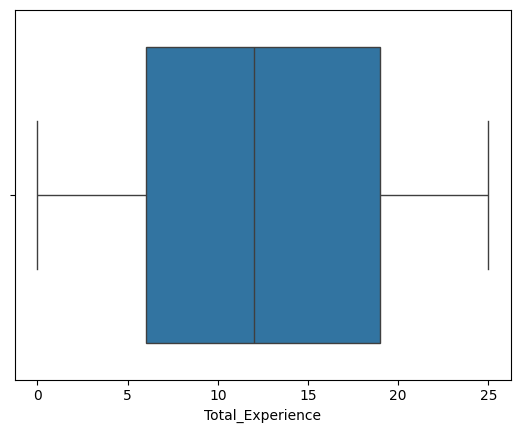

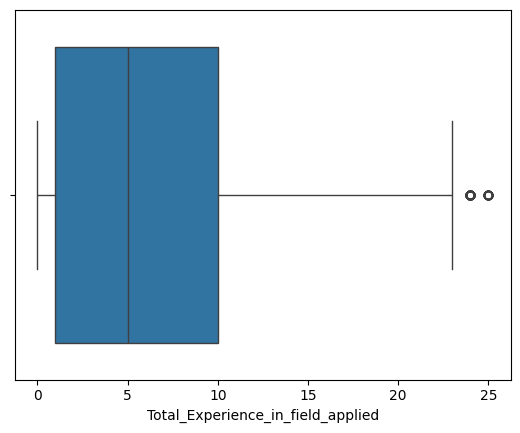

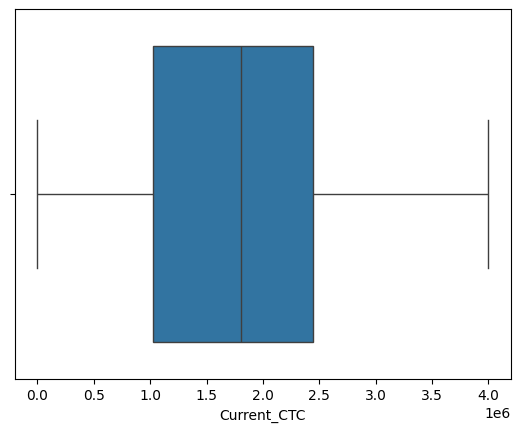

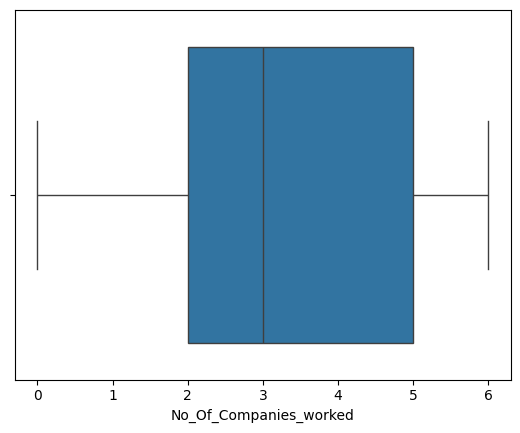

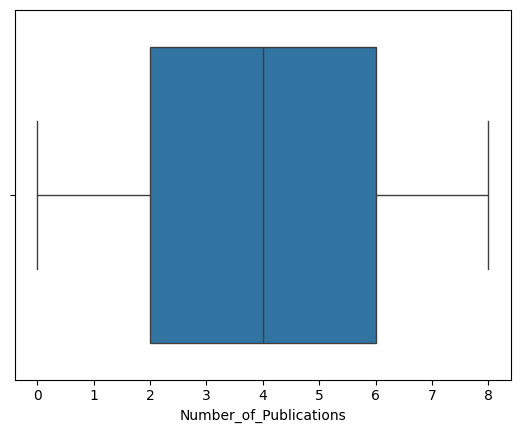

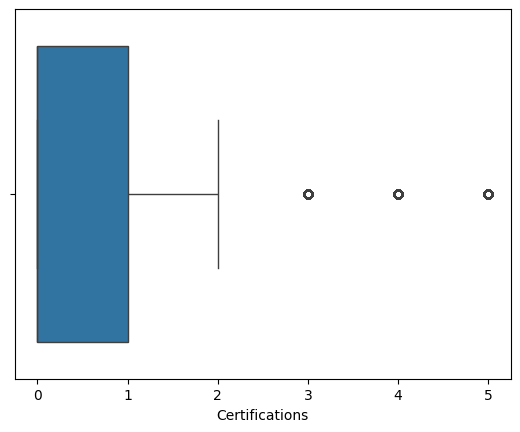

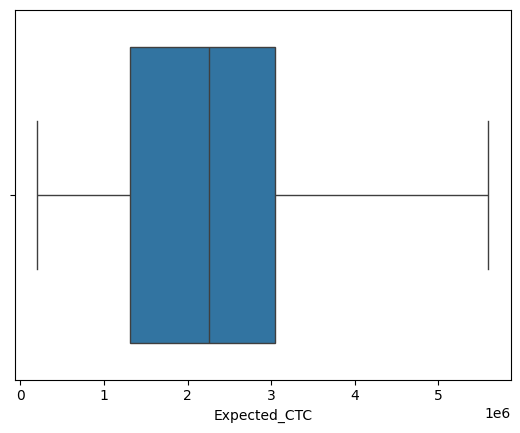

In [26]:
for i in Data_EF.select_dtypes(include=np.number).columns:
    sns.boxplot(data=Data_EF,x=i)
    plt.show()

In [27]:
for column in nums:
    lr,ur=remove_outlier(Data_EF[column])
    Data_EF[column]=np.where(Data_EF[column]>ur,ur,Data_EF[column])
    Data_EF[column]=np.where(Data_EF[column]<lr,lr,Data_EF[column])

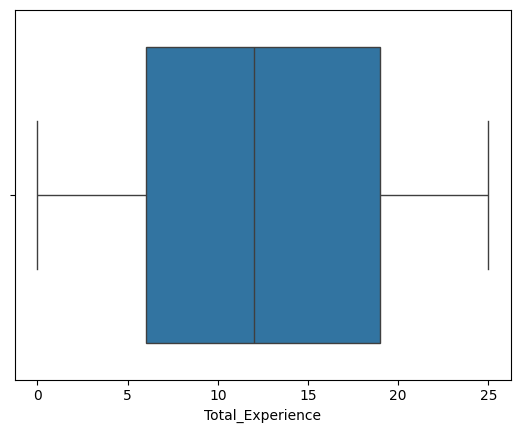

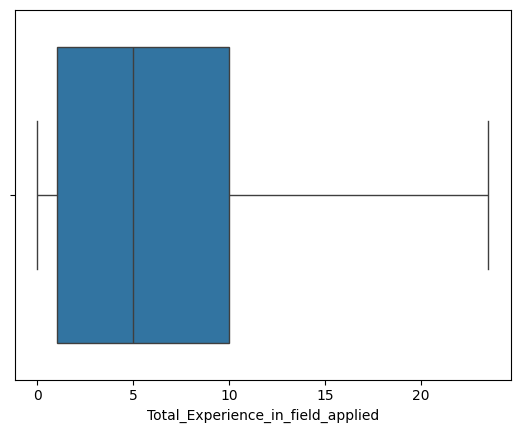

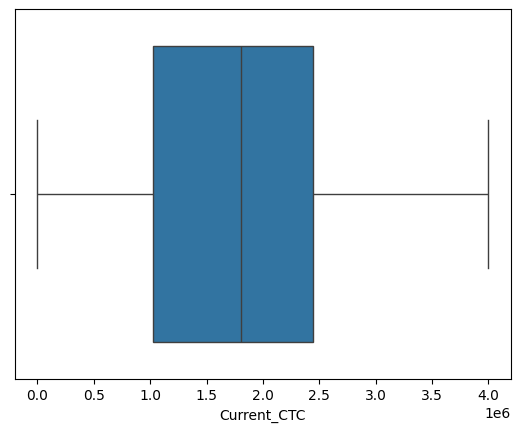

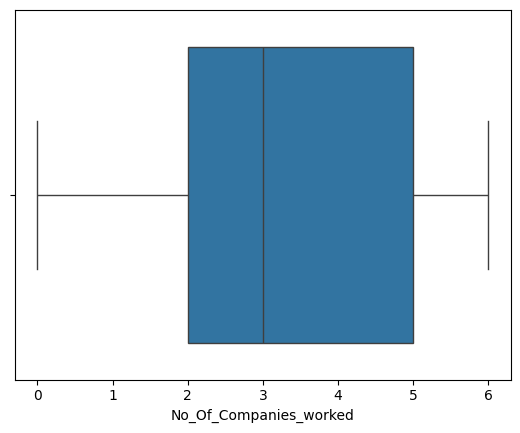

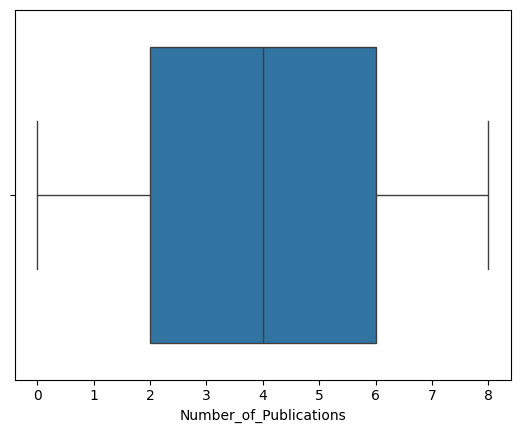

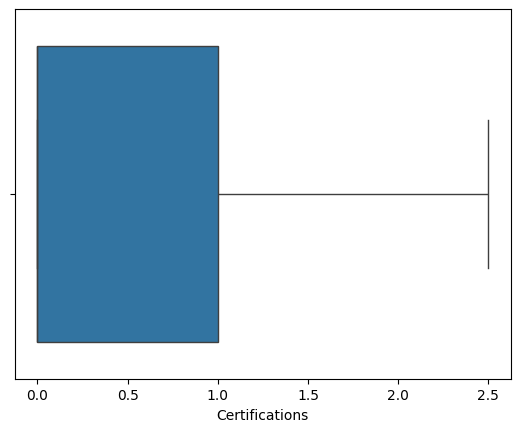

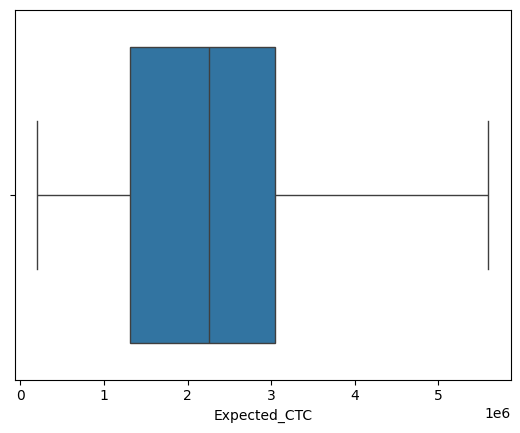

In [28]:
for i in Data_EF.select_dtypes(include=np.number).columns:
    sns.boxplot(data=Data_EF,x=i)
    plt.show()

In [29]:
Data_EF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 24970
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  float64
 1   Total_Experience_in_field_applied  25000 non-null  float64
 2   Department                         24092 non-null  object 
 3   Role                               24092 non-null  object 
 4   Industry                           24092 non-null  object 
 5   Designation                        24092 non-null  object 
 6   Education                          25000 non-null  object 
 7   Curent_Location                    25000 non-null  object 
 8   Preferred_location                 25000 non-null  object 
 9   Current_CTC                        25000 non-null  float64
 10  Inhand_Offer                       25000 non-null  object 
 11  Last_Appraisal_Rating              24092 non-null  object 


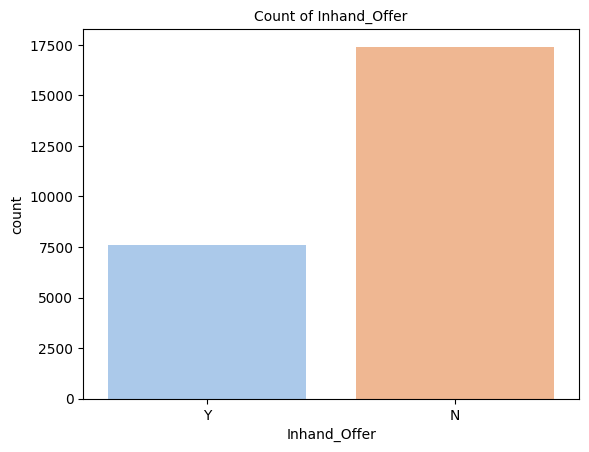

In [31]:
# Uni-variate analysis
sns.countplot(x='Inhand_Offer', data=Data_EF, palette='pastel')
plt.title("Count of Inhand_Offer", fontsize=10)
plt.show()

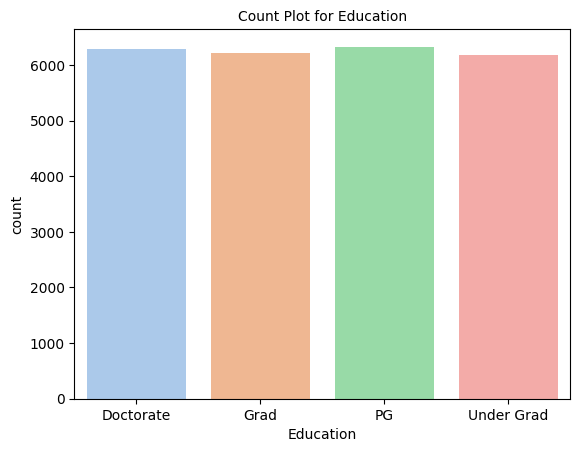

In [32]:
sns.countplot(x='Education', data=Data_EF, palette='pastel')
plt.title("Count Plot for Education", fontsize=10)
plt.show()

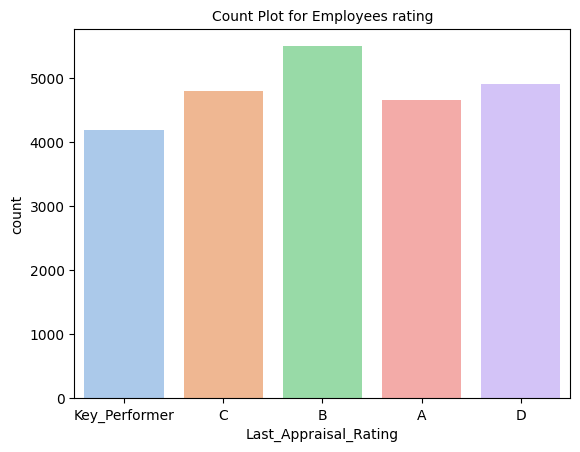

In [33]:
sns.countplot(x='Last_Appraisal_Rating', data=Data_EF, palette='pastel')
plt.title("Count Plot for Employees rating", fontsize=10)
plt.show()

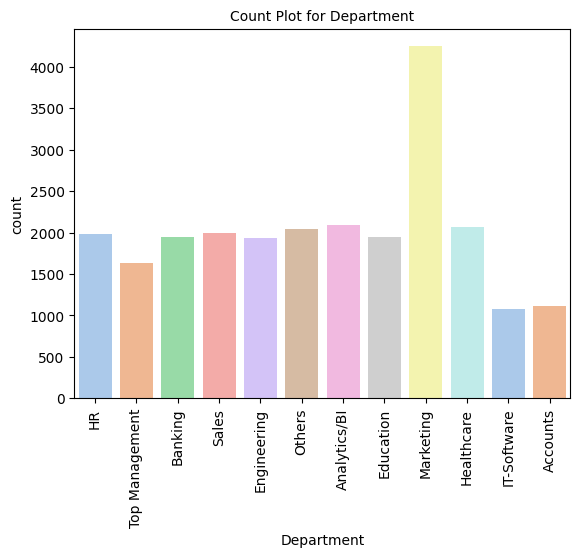

In [34]:
sns.countplot(x='Department', data=Data_EF, palette='pastel')
plt.title("Count Plot for Department", fontsize=10)
plt.xticks(rotation=90)
plt.show()

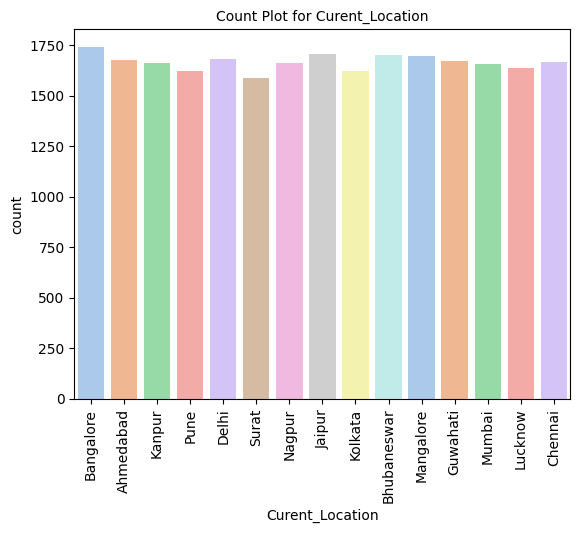

In [35]:
sns.countplot(x='Curent_Location', data=Data_EF, palette='pastel')
plt.title("Count Plot for Curent_Location", fontsize=10)
plt.xticks(rotation=90)
plt.show()

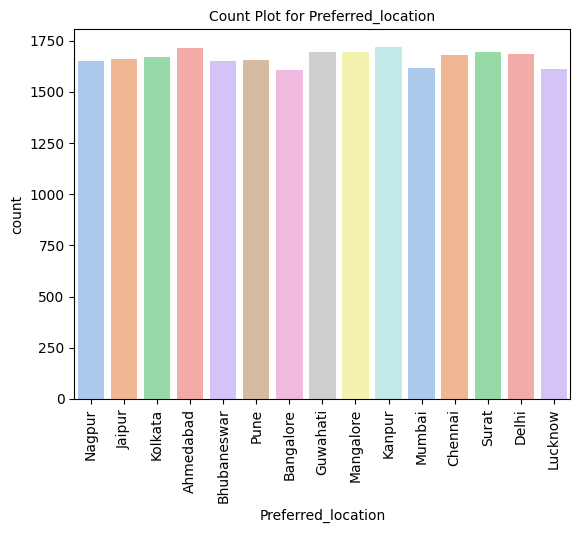

In [36]:
sns.countplot(x='Preferred_location', data=Data_EF, palette='pastel')
plt.title("Count Plot for Preferred_location", fontsize=10)
plt.xticks(rotation=90)
plt.show()

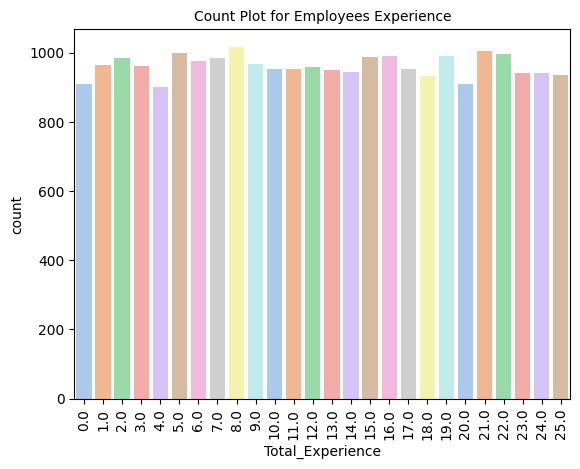

In [37]:
sns.countplot(x='Total_Experience', data=Data_EF, palette='pastel')
plt.title("Count Plot for Employees Experience", fontsize=10)
plt.xticks(rotation=90)
plt.show()

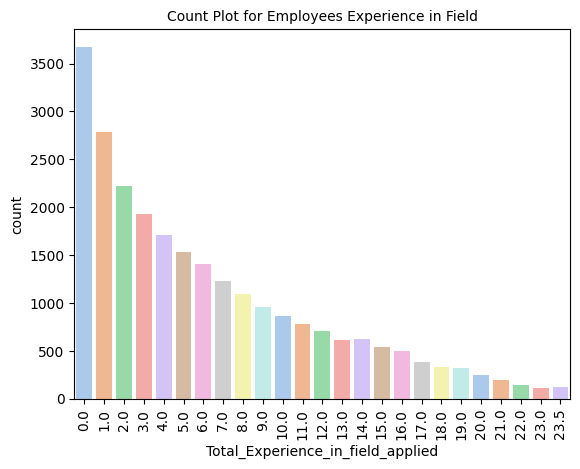

In [38]:
sns.countplot(x='Total_Experience_in_field_applied', data=Data_EF, palette='pastel')
plt.title("Count Plot for Employees Experience in Field", fontsize=10)
plt.xticks(rotation=90)
plt.show()

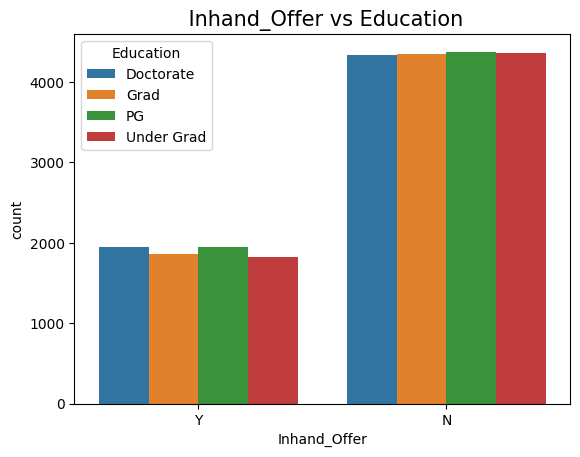

In [39]:
# Bivariate
sns.countplot(x='Inhand_Offer', hue='Education', data=Data_EF)
plt.title(" Inhand_Offer vs Education", fontsize=15)
plt.show()

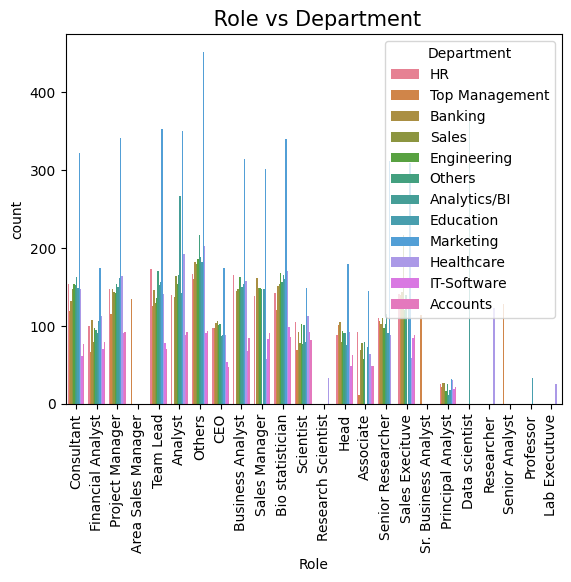

In [40]:
sns.countplot(x='Role', hue='Department', data=Data_EF)
plt.title(" Role vs Department", fontsize=15)
plt.xticks(rotation=90)
plt.show()

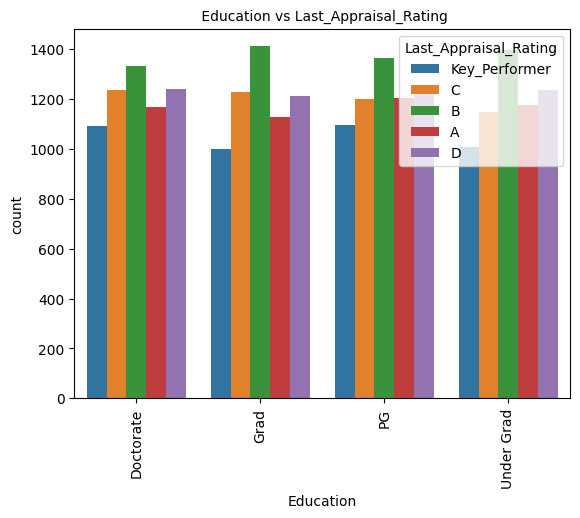

In [41]:
sns.countplot(x='Education', hue='Last_Appraisal_Rating', data=Data_EF)
plt.title(" Education vs Last_Appraisal_Rating", fontsize=10)
plt.xticks(rotation=90)
plt.show()

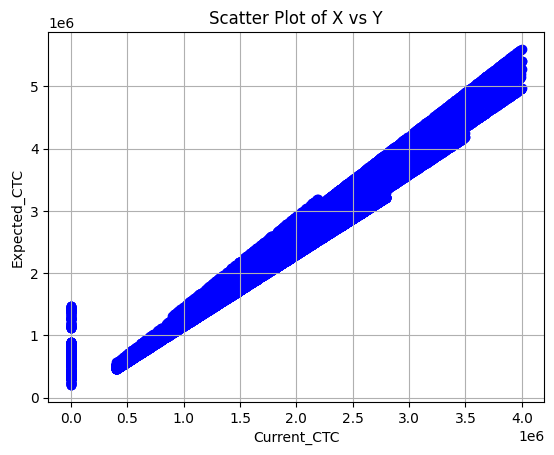

In [42]:
plt.scatter(Data_EF['Current_CTC'], Data_EF['Expected_CTC'], color='blue')
plt.xlabel('Current_CTC')
plt.ylabel('Expected_CTC')
plt.title('Scatter Plot of X vs Y')
plt.grid(True)
plt.show()

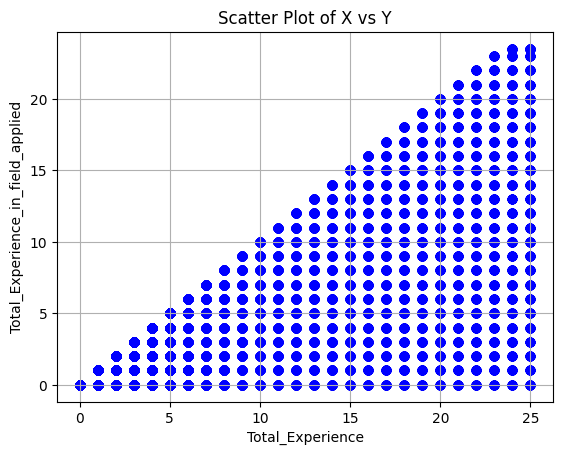

In [43]:
plt.scatter(Data_EF['Total_Experience'], Data_EF['Total_Experience_in_field_applied'], color='blue')
plt.xlabel('Total_Experience')
plt.ylabel('Total_Experience_in_field_applied')
plt.title('Scatter Plot of X vs Y')
plt.grid(True)
plt.show()

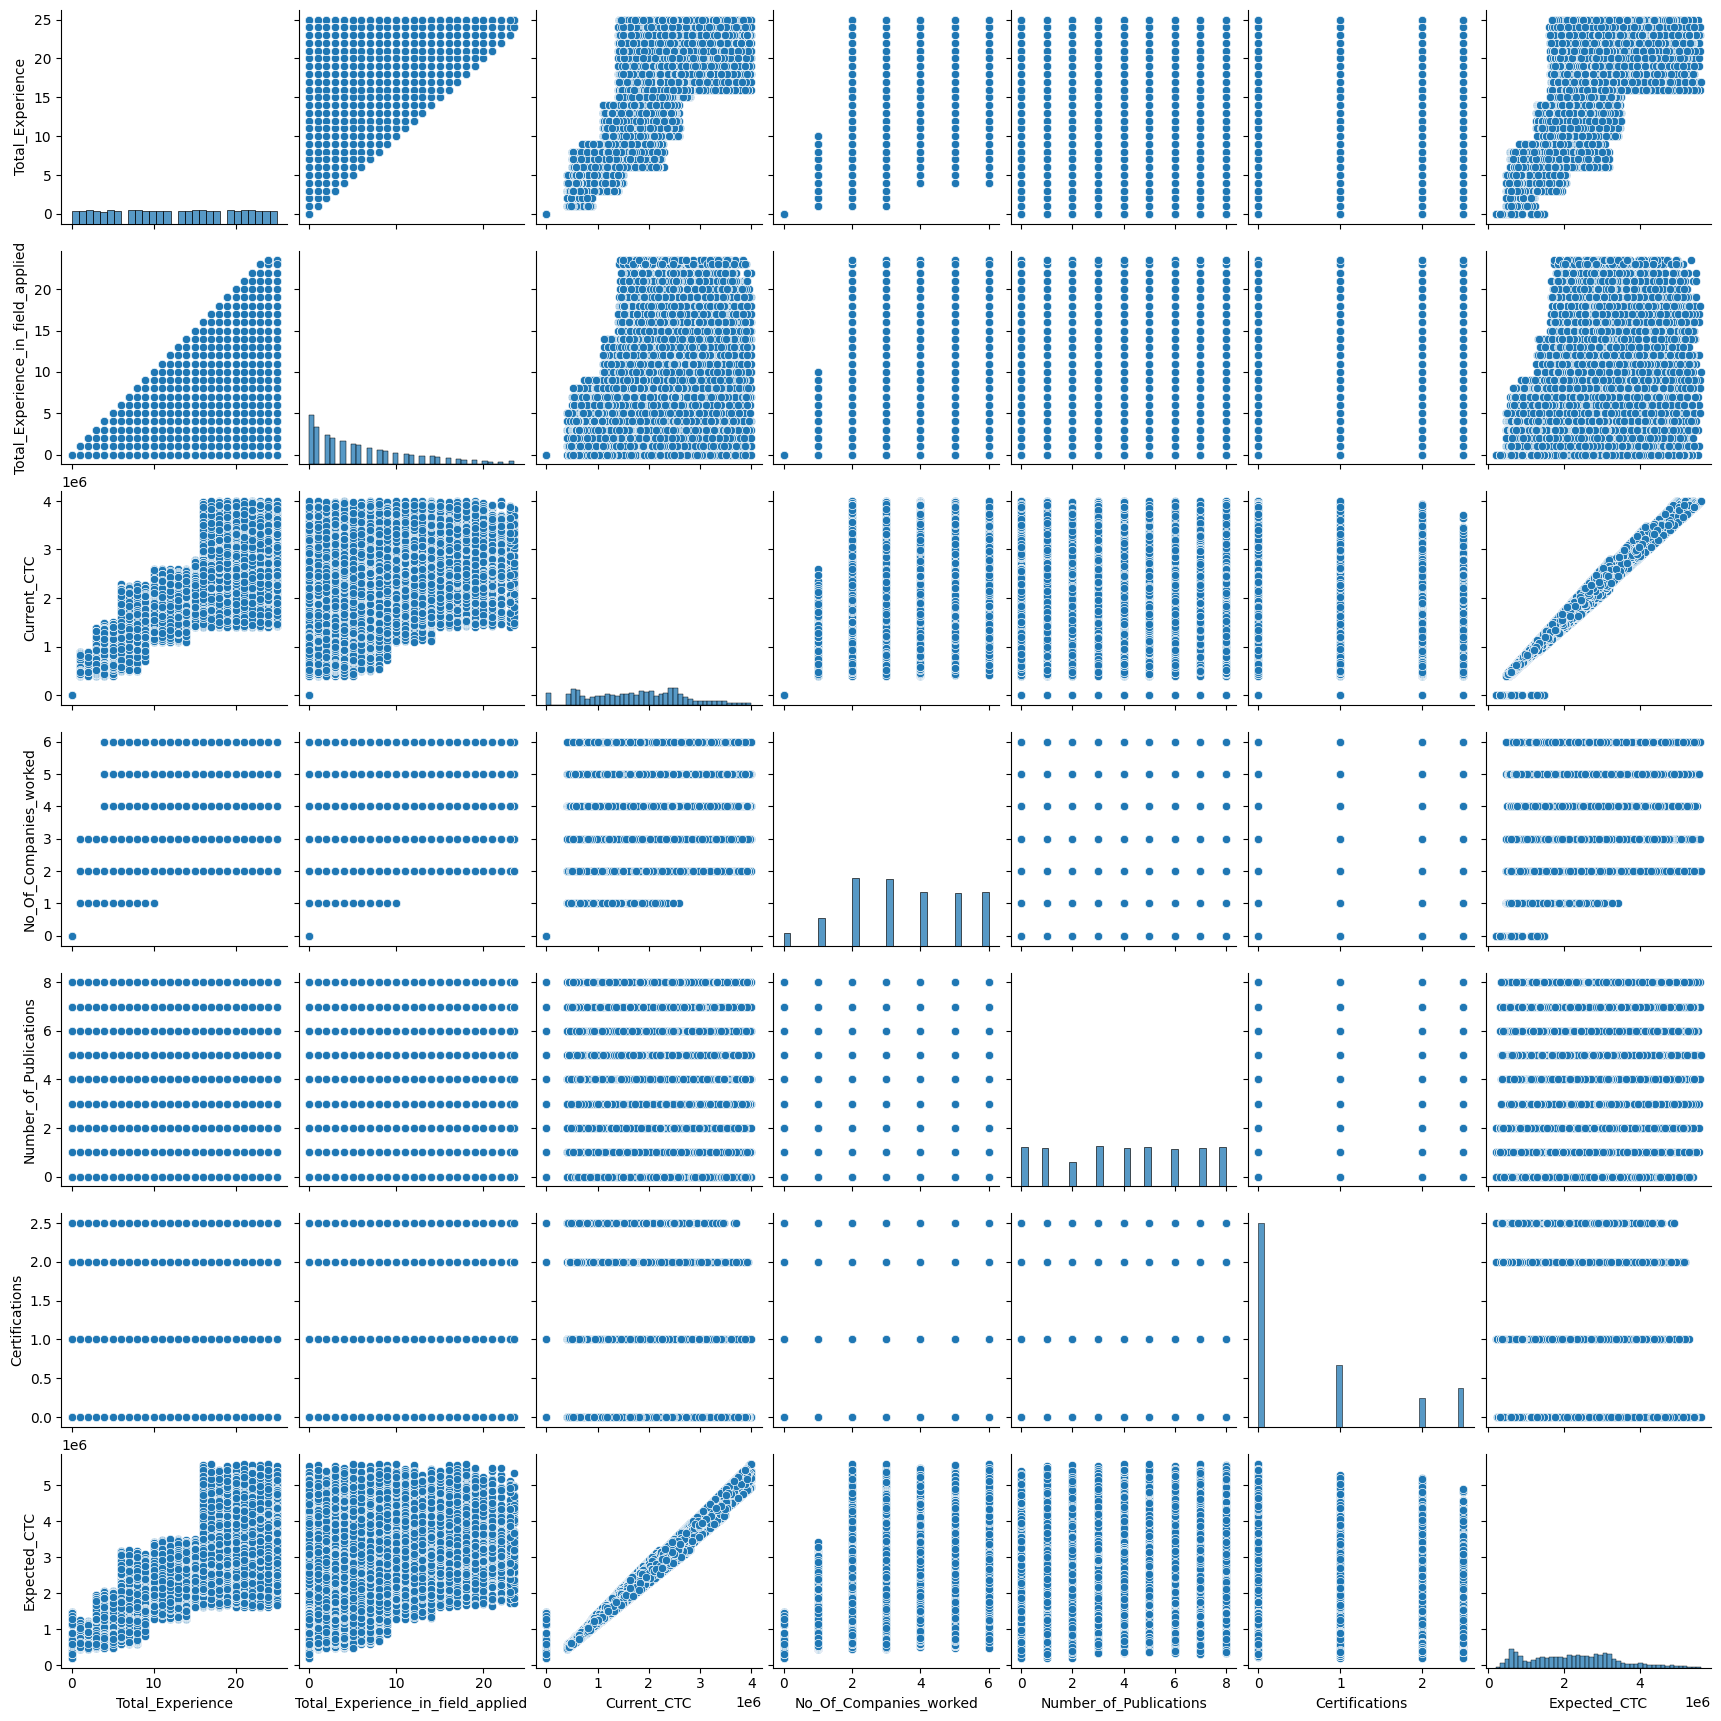

In [44]:
#Bivariate
sns.pairplot(Data_EF)

<Axes: >

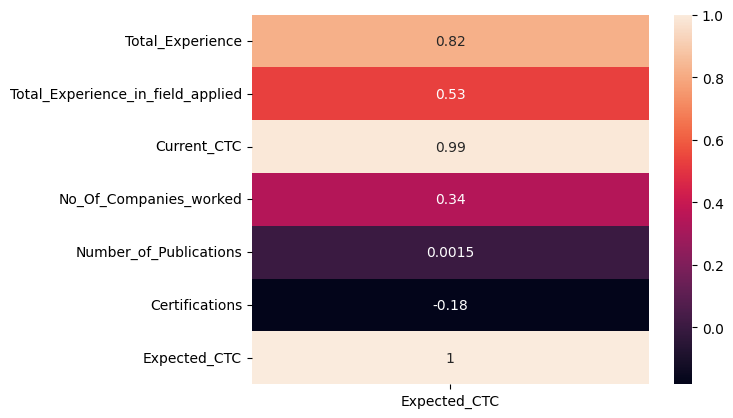

In [45]:
# Assuming 'Expected_CTC' is the target column
numeric_columns = Data_EF.select_dtypes(include=['number']).columns.tolist()

# Compute the correlation matrix for numeric columns only
correlation_matrix = Data_EF[numeric_columns].corr()

# Plot heatmap for the correlation matrix of 'Expected_CTC'
sns.heatmap(correlation_matrix[['Expected_CTC']], annot=True)

In [46]:
Data_EF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 24970
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  float64
 1   Total_Experience_in_field_applied  25000 non-null  float64
 2   Department                         24092 non-null  object 
 3   Role                               24092 non-null  object 
 4   Industry                           24092 non-null  object 
 5   Designation                        24092 non-null  object 
 6   Education                          25000 non-null  object 
 7   Curent_Location                    25000 non-null  object 
 8   Preferred_location                 25000 non-null  object 
 9   Current_CTC                        25000 non-null  float64
 10  Inhand_Offer                       25000 non-null  object 
 11  Last_Appraisal_Rating              24092 non-null  object 


In [47]:
cats = list(Data_EF.dtypes[Data_EF.dtypes=='object'].index)

In [48]:
cats

['Department',
 'Role',
 'Industry',
 'Designation',
 'Education',
 'Curent_Location',
 'Preferred_location',
 'Inhand_Offer',
 'Last_Appraisal_Rating']

In [49]:
encoded_data = pd.get_dummies(Data_EF, columns=cats,prefix=cats,drop_first=True)


In [50]:
encoded_data.head()

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,Expected_CTC,Department_Analytics/BI,Department_Banking,Department_Education,...,Preferred_location_Mangalore,Preferred_location_Mumbai,Preferred_location_Nagpur,Preferred_location_Pune,Preferred_location_Surat,Inhand_Offer_Y,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer
1,23.0,14.0,2702664.0,2.0,4.0,0.0,3783729.0,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,21.0,12.0,2236661.0,5.0,3.0,0.0,3131325.0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,15.0,8.0,2100510.0,5.0,3.0,0.0,2608833.0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,10.0,5.0,1931644.0,2.0,3.0,0.0,2221390.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,16.0,3.0,3511167.0,5.0,4.0,0.0,4522383.0,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [51]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 24970
Columns: 104 entries, Total_Experience to Last_Appraisal_Rating_Key_Performer
dtypes: bool(97), float64(7)
memory usage: 3.8 MB


In [52]:
encoded_data.isnull().sum()

Total_Experience                       0
Total_Experience_in_field_applied      0
Current_CTC                            0
No_Of_Companies_worked                 0
Number_of_Publications                 0
                                      ..
Inhand_Offer_Y                         0
Last_Appraisal_Rating_B                0
Last_Appraisal_Rating_C                0
Last_Appraisal_Rating_D                0
Last_Appraisal_Rating_Key_Performer    0
Length: 104, dtype: int64

In [53]:
# Are there any duplicates ?
dups = encoded_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


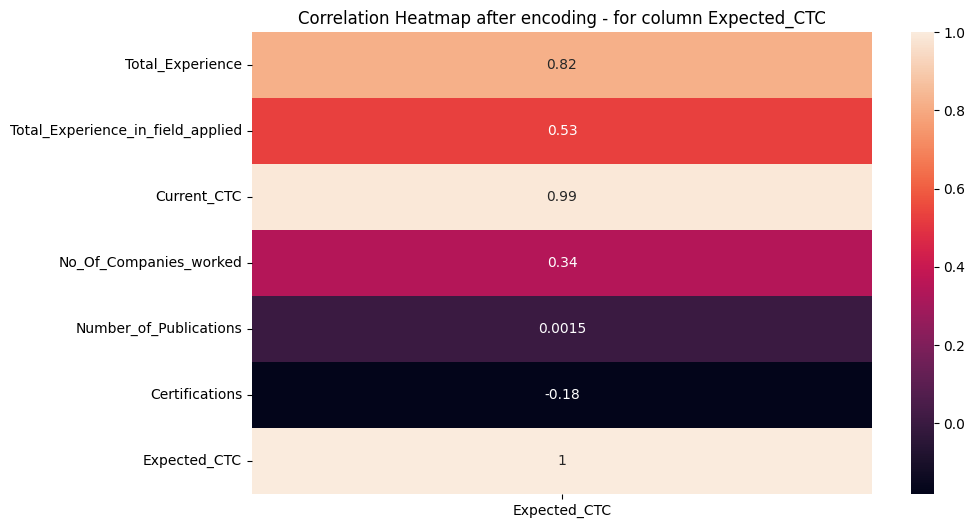

In [72]:
# Filter out non-numeric columns
numeric_columns = Data_EF.select_dtypes(include=['number']).columns.tolist()

# Calculate the correlation matrix for numeric columns only
correlation_matrix = Data_EF[numeric_columns].corr()

# Set the desired figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix[['Expected_CTC']], annot=True)
plt.title("Correlation Heatmap after encoding - for column Expected_CTC")

# Show the plot
plt.show()

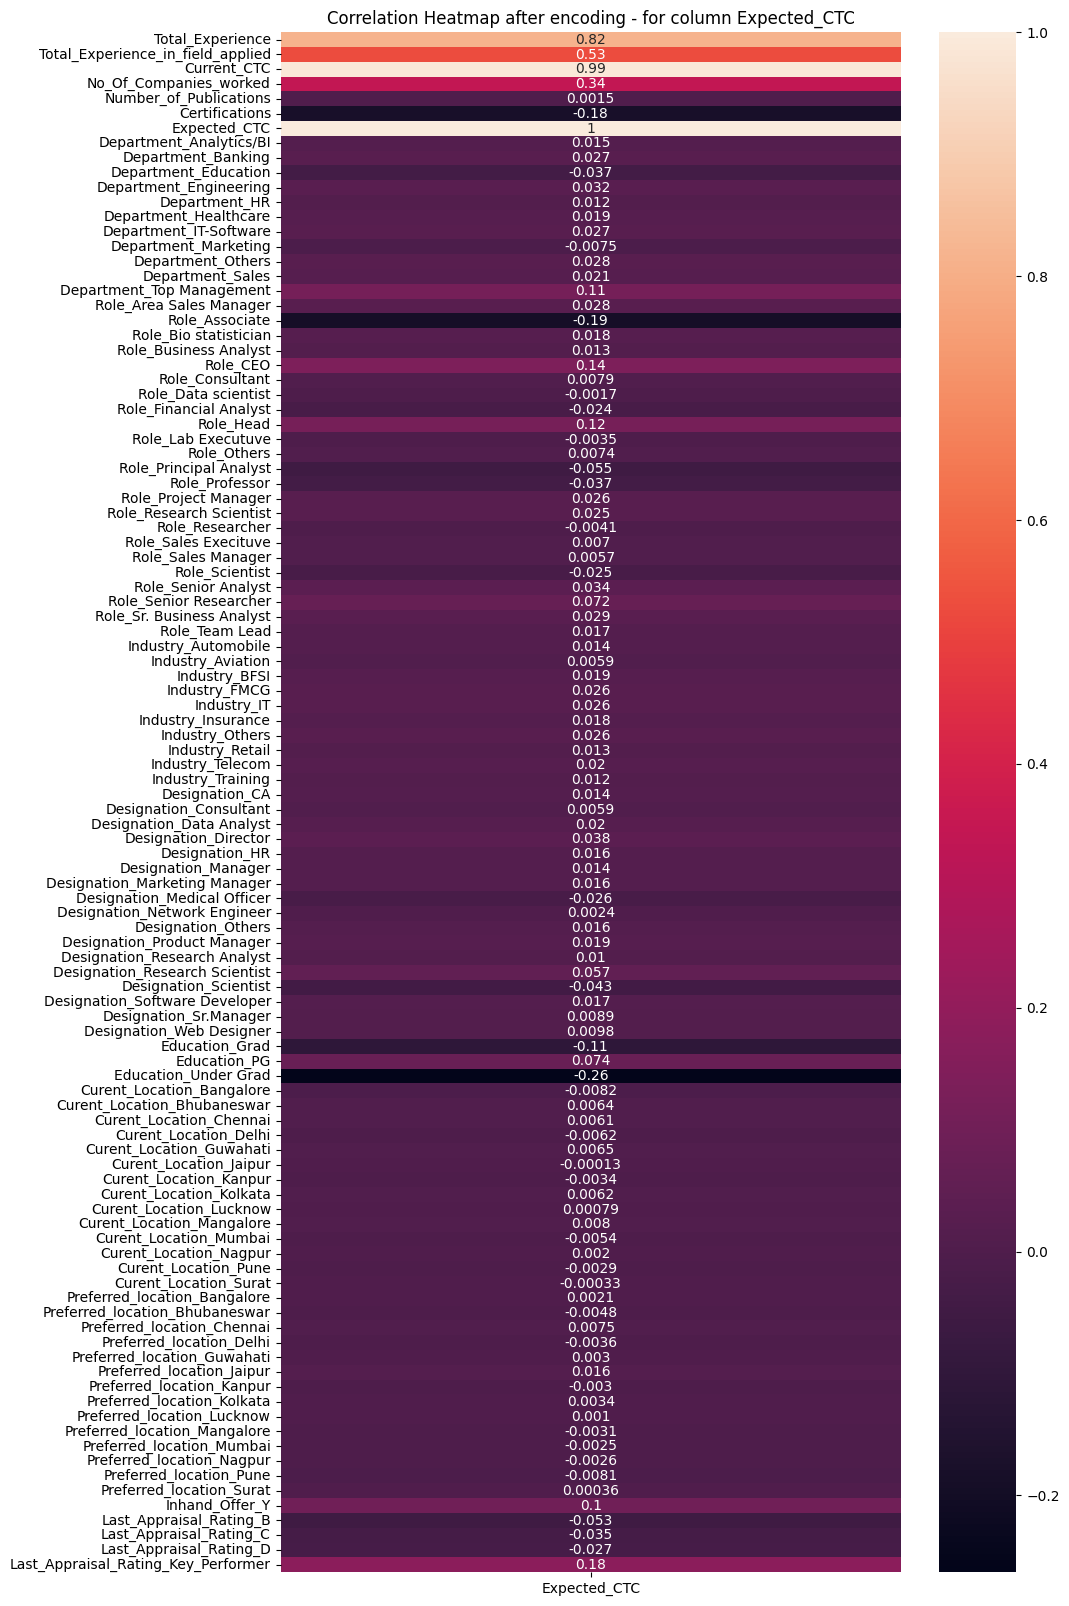

In [70]:
plt.figure(figsize=(10, 20))
sns.heatmap(encoded_data.corr()[['Expected_CTC']],annot=True)
plt.title("Correlation Heatmap after encoding - for column Expected_CTC")
plt.show()

In [55]:
# Split the data into features (X) and target variable (y)
X = encoded_data.drop('Expected_CTC', axis=1)
y = encoded_data['Expected_CTC']

In [56]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
X_train= scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [59]:
y_train
X_test
X_train

array([[ 0.0656527 ,  0.3015644 , -0.03972808, ...,  2.02681959,
        -0.49239873, -0.44899106],
       [-0.3367719 , -0.21554667,  0.02721713, ..., -0.49338382,
        -0.49239873, -0.44899106],
       [-1.67818724, -1.07739844, -1.91453108, ..., -0.49338382,
        -0.49239873, -0.44899106],
       ...,
       [ 1.13878497,  1.68052724,  1.01688891, ..., -0.49338382,
        -0.49239873, -0.44899106],
       [ 1.40706804,  0.99104582,  1.97471664, ..., -0.49338382,
        -0.49239873,  2.22721585],
       [ 1.67535111,  0.64630511,  0.25436725, ..., -0.49338382,
        -0.49239873, -0.44899106]])

In [60]:
# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_predictions = linear_regression_model.predict(X_test)

# Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# Naive Bayes (Not typically used for regression, treating regression as classification)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# AdaBoost
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)



# Evaluate models
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

print("Linear Regression:")
evaluate_model(linear_regression_predictions, y_test)
print("\nDecision Tree:")
evaluate_model(decision_tree_predictions, y_test)
print("\nRandom Forest:")
evaluate_model(random_forest_predictions, y_test)
print("\nNaive Bayes:")
evaluate_model(naive_bayes_predictions, y_test)
print("\nKNN:")
evaluate_model(knn_predictions, y_test)
print("\nAdaBoost:")
evaluate_model(adaboost_predictions, y_test)
print("\nGradient Boosting:")
evaluate_model(gradient_boosting_predictions, y_test)
print("\nSVM:")
evaluate_model(svm_predictions, y_test)
print("\nXGBoost:")
evaluate_model(xgboost_predictions, y_test)

Linear Regression:
Mean Squared Error: 8470038860.953552
R-squared: 0.9937109654893629

Decision Tree:
Mean Squared Error: 2286179737.6734
R-squared: 0.9983025032702

Random Forest:
Mean Squared Error: 1342387003.9047267
R-squared: 0.9990032727909778

Naive Bayes:
Mean Squared Error: 2159013511760.7488
R-squared: -0.6030753467955903

KNN:
Mean Squared Error: 650660093008.285
R-squared: 0.5168825259483165

AdaBoost:
Mean Squared Error: 31701214426.1499
R-squared: 0.9764617335495058

Gradient Boosting:
Mean Squared Error: 2742060224.485547
R-squared: 0.9979640103587325

SVM:
Mean Squared Error: 1346570818386.8357
R-squared: 0.00016629358199682365

XGBoost:
Mean Squared Error: 1181434382.750368
R-squared: 0.9991227806947354


In [62]:
def evaluate_model(true, predicted):
    """
    Compute evaluation metrics for regression models.

    Args:
    true (array-like): True values of the target variable.
    predicted (array-like): Predicted values of the target variable.

    Returns:
    tuple: Tuple containing evaluation metrics (MAE, MSE, RMSE, R-squared).
    """
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [63]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create the best XGBoost model
best_xgb_model = XGBRegressor(**best_params)

# Fit the best model to the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the tuned XGBoost model
mae, mse, rmse, r2 = evaluate_model(y_test, xgb_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 13282.212008333334
MSE: 1112296503.3477023
RMSE: 33351.10947701294
R-squared: 0.9991741158204288


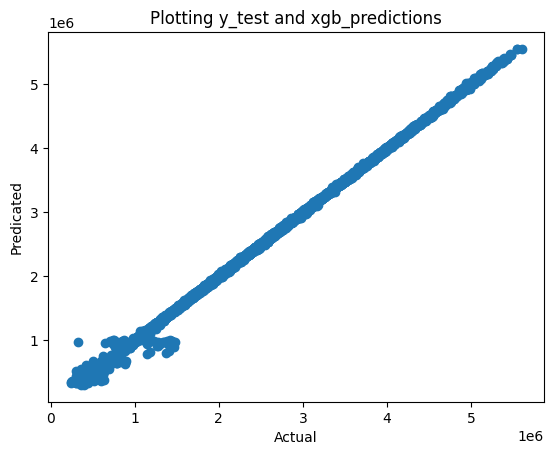

In [65]:
#Plotting

plt.scatter(y_test,xgb_predictions);
plt.title('Plotting y_test and xgb_predictions')
plt.xlabel('Actual');
plt.ylabel('Predicated');
plt.show()

 #Conclusion

 conclude as XG Boosting Regressorgives the best result as both train and test scores are not much deviatinga and also the R2 score is best in both train and test cases.

Model performance for Train and test set

Root Mean Square Error : 33351.10947701294
Mean Absolute Error : 13282.212008333334
R2 Score : 0.9991741158204288